<a href="https://colab.research.google.com/github/govind527/Pytorch_Practice/blob/main/pytorch_computer_vision.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
## importing libraries

import torch
from torch import nn

import torchvision
from torchvision import datasets
from torchvision import transforms

from torchvision.transforms import ToTensor

import matplotlib.pyplot as plt

print(torchvision.__version__)

0.21.0+cu124


In [3]:
train_data=datasets.FashionMNIST(
    root="data",# where to download the data
    train=True,
    download=True,
    transform=torchvision.transforms.ToTensor(), ## how we want to transform data
    target_transform =None ## wnat to transform labels
)

test_data=datasets.FashionMNIST(
    root="data", # where to download the data
    train=False,
    download=True,
    transform=ToTensor(), ## how we want to transform data
    target_transform =None ## wnat to transform labels
)

100%|██████████| 26.4M/26.4M [00:03<00:00, 7.52MB/s]
100%|██████████| 29.5k/29.5k [00:00<00:00, 134kB/s]
100%|██████████| 4.42M/4.42M [00:01<00:00, 2.47MB/s]
100%|██████████| 5.15k/5.15k [00:00<00:00, 8.42MB/s]


In [4]:
len(train_data),len(test_data)

(60000, 10000)

In [5]:
## first training example
image,label=train_data[0]
image,label

(tensor([[[0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000],
          [0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000],
          [0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000],
          [0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0039, 0.0000, 0.0000, 0.0510,
           0.2863, 0.0000, 0.0000, 0.0039, 

In [6]:
image.shape,label

(torch.Size([1, 28, 28]), 9)

In [25]:
class_names=train_data.classes
class_names

['T-shirt/top',
 'Trouser',
 'Pullover',
 'Dress',
 'Coat',
 'Sandal',
 'Shirt',
 'Sneaker',
 'Bag',
 'Ankle boot']

In [8]:
class_to_id=train_data.class_to_idx
class_to_id

{'T-shirt/top': 0,
 'Trouser': 1,
 'Pullover': 2,
 'Dress': 3,
 'Coat': 4,
 'Sandal': 5,
 'Shirt': 6,
 'Sneaker': 7,
 'Bag': 8,
 'Ankle boot': 9}

In [9]:
train_data.targets

tensor([9, 0, 0,  ..., 3, 0, 5])

## visualizing data

torch.Size([1, 28, 28])


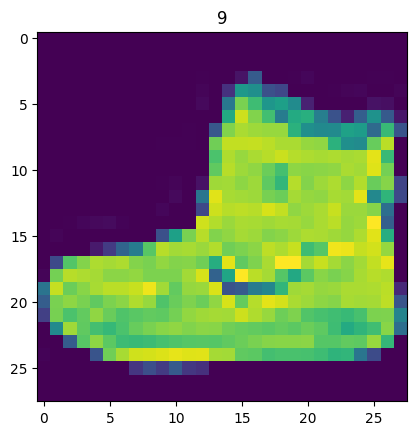

In [10]:
import matplotlib.pyplot as plt
image,label=train_data[0]
print(image.shape)
plt.imshow(image.squeeze())
plt.title(label);

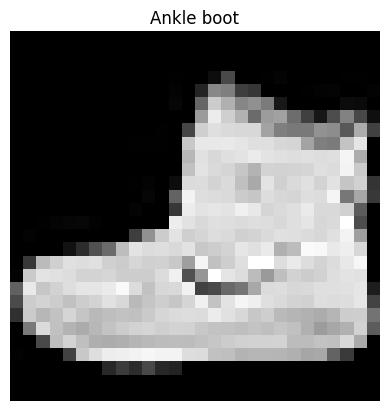

In [11]:
plt.imshow(image.squeeze(),cmap="gray")
plt.title(train_data.classes[label])
plt.axis(False);

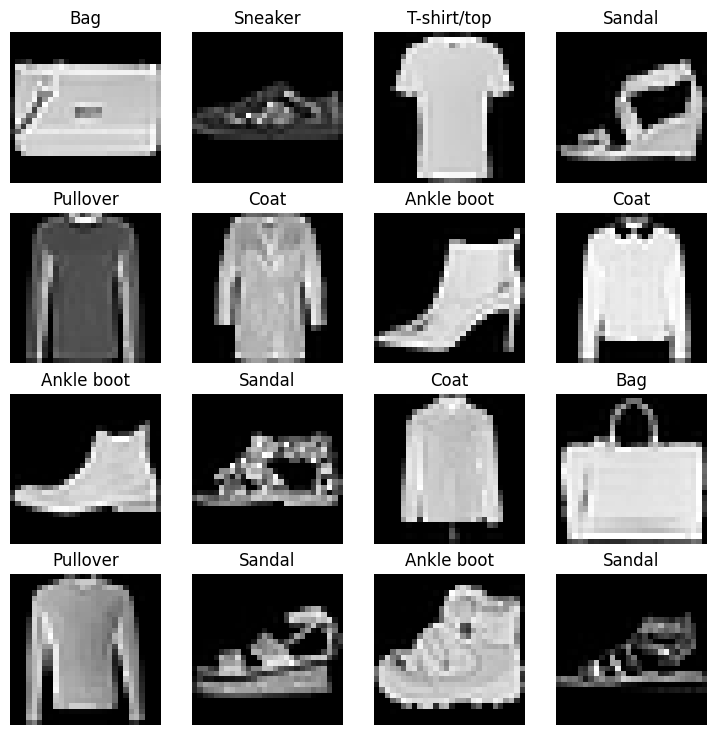

In [12]:
##torch.manual_seed(42)
fig=plt.figure(figsize=(9,9))
rows,cols=4,4
for i in range(1,rows*cols+1):
  random_idx=torch.randint(0,len(train_data),size=[1]).item()
  img,label=train_data[random_idx]
  fig.add_subplot(rows,cols,i)
  plt.imshow(img.squeeze(),cmap="gray")
  plt.title(train_data.classes[label])
  plt.axis(False);

## dataloader preparation

In [13]:
train_data,test_data

(Dataset FashionMNIST
     Number of datapoints: 60000
     Root location: data
     Split: Train
     StandardTransform
 Transform: ToTensor(),
 Dataset FashionMNIST
     Number of datapoints: 10000
     Root location: data
     Split: Test
     StandardTransform
 Transform: ToTensor())

In [14]:
from torch.utils.data import DataLoader
BATCH_SIZE=32
train_dataloader=DataLoader(dataset=train_data,
                            batch_size=BATCH_SIZE,
                            shuffle=True)

test_dataloader=DataLoader(dataset=test_data,
                            batch_size=BATCH_SIZE,
                            shuffle=False)

train_dataloader,test_dataloader

(<torch.utils.data.dataloader.DataLoader at 0x7ccb45bb70d0>,
 <torch.utils.data.dataloader.DataLoader at 0x7ccb70928a50>)

In [15]:
print(f"train Dataloader : {train_dataloader}")
print(f"train Dataloader length : {len(train_dataloader)} of batches {BATCH_SIZE}")
print(f"test Dataloader length : {len(test_dataloader)} of batches {BATCH_SIZE}")

train Dataloader : <torch.utils.data.dataloader.DataLoader object at 0x7ccb45bb70d0>
train Dataloader length : 1875 of batches 32
test Dataloader length : 313 of batches 32


In [19]:
train_features_batch,train_label_batch=next(iter(train_dataloader))

train_features_batch.shape

torch.Size([32, 1, 28, 28])

image size: torch.Size([1, 28, 28])
label : 9 || label size: torch.Size([])


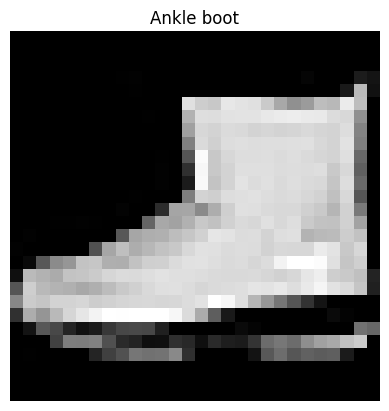

In [27]:
torch.manual_seed(42)
random_idx=torch.randint(0,len(train_features_batch),size=[1]).item()
img,label=train_features_batch[random_idx],train_label_batch[random_idx]
plt.imshow(img.squeeze(),cmap='gray')
plt.title(class_names[label])
plt.axis(False)
print(f"image size: {img.shape}")
print(f"label : {label} || label size: {label.shape}")

## building first baseline model for cv

In [30]:
from torch import nn
class FashionMNISTModelV0(nn.Module):
  def __init__(self,
               input_shape:int,
               hidden_units:int,
               output_shape:int
               ):
    super().__init__()
    self.layer_stack=nn.Sequential(
        nn.Flatten(),
        nn.Linear(in_features=input_shape,
                  out_features=hidden_units),
        nn.Linear(in_features=hidden_units,
                  out_features=output_shape),

    )

  def forward(self,x):
    return self.layer_stack(x)

In [31]:
torch.manual_seed(42)
model_0=FashionMNISTModelV0(
    input_shape=784,
    hidden_units=10,
    output_shape=len(class_names)
).to("cpu")
model_0

FashionMNISTModelV0(
  (layer_stack): Sequential(
    (0): Flatten(start_dim=1, end_dim=-1)
    (1): Linear(in_features=784, out_features=10, bias=True)
    (2): Linear(in_features=10, out_features=10, bias=True)
  )
)

In [32]:
dummy_x=torch.rand([1,1,28,28])
model_0(dummy_x)

tensor([[-0.0315,  0.3171,  0.0531, -0.2525,  0.5959,  0.2112,  0.3233,  0.2694,
         -0.1004,  0.0157]], grad_fn=<AddmmBackward0>)